# Evaluación de Regresión.

## Métrica de Regresión.

Normalmente $r^2$ score es suficiente:<br>
* Indica cómo de bien instancias futuras serán predecidas.
* Mejor 1, peor 0.

Alternativas:<br>
* mean_absolute_error (MAE): Diferencia absoluta del objetivo y los valores predecidos.
* mean_squared_error (MSE): Diferencia cuadrada del objetivo y los valores predecidos.
* median_absolute_error: Es más robusto a valores extremos.

## Regresor Dummy.

Como en la clasificación, la comparación de una predicción dummy que usa una regla de correción con nuestro modelo puede ser útil.<br>
El regresor dummy implementa cuatro reglas simples:
* mean.
* median.
* quantile.
* constant.

Coeficiente del Modelo Linear:  [-698.80206267]
Linear Mae: 4646.740
Dummy Mae: 4965.126
Linear r2: 0.063990
Dummy r2: -0.000144


<IPython.core.display.Javascript object>


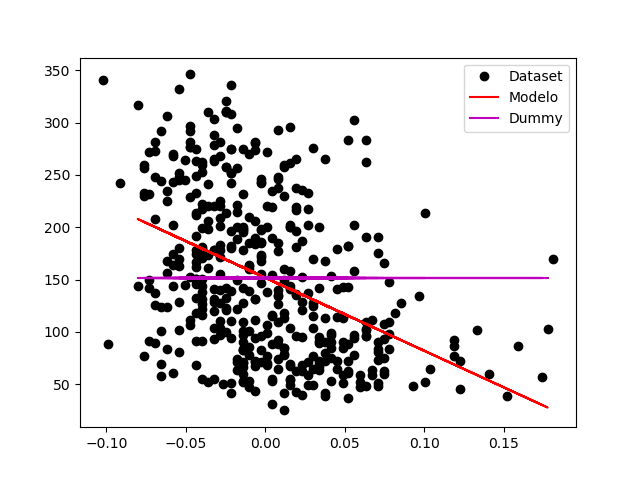

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes=datasets.load_diabetes()

X=diabetes.data[:,None,6]
y=diabetes.target

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lm=LinearRegression().fit(X_train,y_train)
lm_dummy=DummyRegressor(strategy='mean').fit(X_train,y_train)

y_predict=lm.predict(X_test)
y_predict_dummy=lm_dummy.predict(X_test)

print('Coeficiente del Modelo Linear: ',lm.coef_)

print('Linear Mae: {:.3f}'.format(mean_squared_error(y_test,y_predict)))
print('Dummy Mae: {:.3f}'.format(mean_squared_error(y_test,y_predict_dummy)))

print('Linear r2: {:3f}'.format(r2_score(y_test,y_predict)))
print('Dummy r2: {:3f}'.format(r2_score(y_test,y_predict_dummy)))

plt.figure()
plt.plot(X,y,'ko')
plt.plot(X_test,y_predict,'r-')
plt.plot(X_test,y_predict_dummy,'m-')
plt.legend(['Dataset','Modelo','Dummy'])
plt.show()